In [1]:
import pandas as pd
from sklearn.cluster import KMeans
data = pd.read_excel('高斯混合模型.xlsx')[['*天门冬氨酸氨基转换酶', '尿酸', '年龄', '性别', '甘油三酯', '红细胞体积分布宽度', '红细胞平均体积',
       '红细胞计数', '血小板平均体积', '血红蛋白', '血糖']]
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import pylab as plt
import matplotlib as mpl
from sklearn.metrics import silhouette_score
import numpy as np

X = data.iloc[:,-1].values.reshape(-1, 1)
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]


d:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change

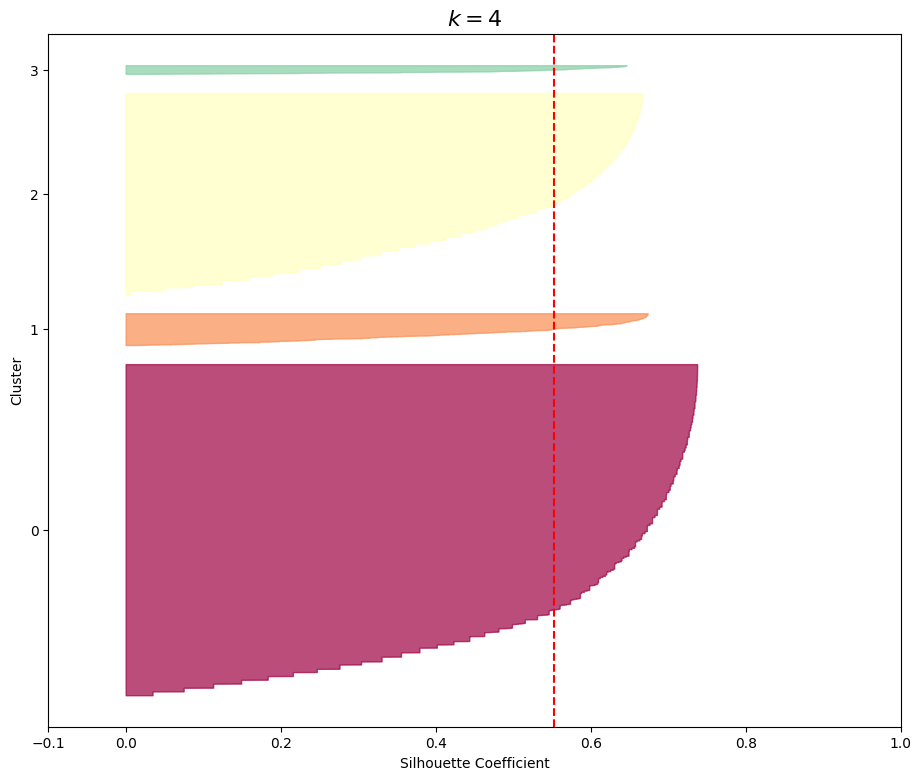

In [4]:
X = data.iloc[:,-1].values.reshape(-1, 1)
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]
plt.figure(figsize=(11, 9))

for k in ([4]):
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in [4]:
        plt.ylabel("Cluster")
    
    if k in [4]:
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)
plt.savefig('聚类检验图')


In [5]:
md = KMeans(n_clusters=4,  random_state=42).fit(X)

d:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [6]:
data['血糖分类'] = md.labels_

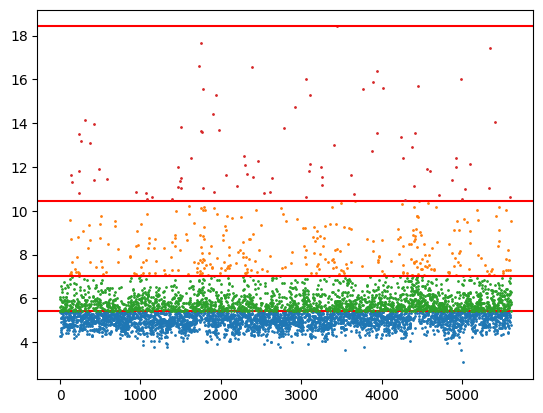

In [8]:
import pylab as plt
for i in range(4):
    plt.plot(data[md.labels_ == i]['血糖'], 'o', markersize = 1)
    print()
    plt.axhline(data[md.labels_ == i]['血糖'].max(), c = 'r')
plt.savefig('聚类效果图.png')

In [28]:
import pandas as pd
from sklearn.cluster import KMeans
import warnings
import pylab as plt
warnings.filterwarnings('ignore')
plt.rc('font', family = 'SimHei', size = 10)
plt.rc('axes', unicode_minus = False)

kmeans_per_k = [KMeans(n_clusters=k, random_state=42, init='cmean++').fit(data.iloc[:,-1].values.reshape(-1, 1))
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
plt.plot(range(1, 10), inertias, "bo-")
plt.grid()
plt.xticks(range(1, 10, 1))
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.savefig('肘部图.png', dpi = 500)


InvalidParameterError: The 'init' parameter of KMeans must be a str among {'random', 'k-means++'}, a callable or an array-like. Got 'cmean++' instead.

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
data = pd.read_excel('高斯混合模型.xlsx')[['*天门冬氨酸氨基转换酶', '尿酸', '年龄', '性别', '甘油三酯', '红细胞体积分布宽度', '红细胞平均体积',
       '红细胞计数', '血小板平均体积', '血红蛋白', '血糖']]
X = data.iloc[:,-1].values.reshape(-1, 1)

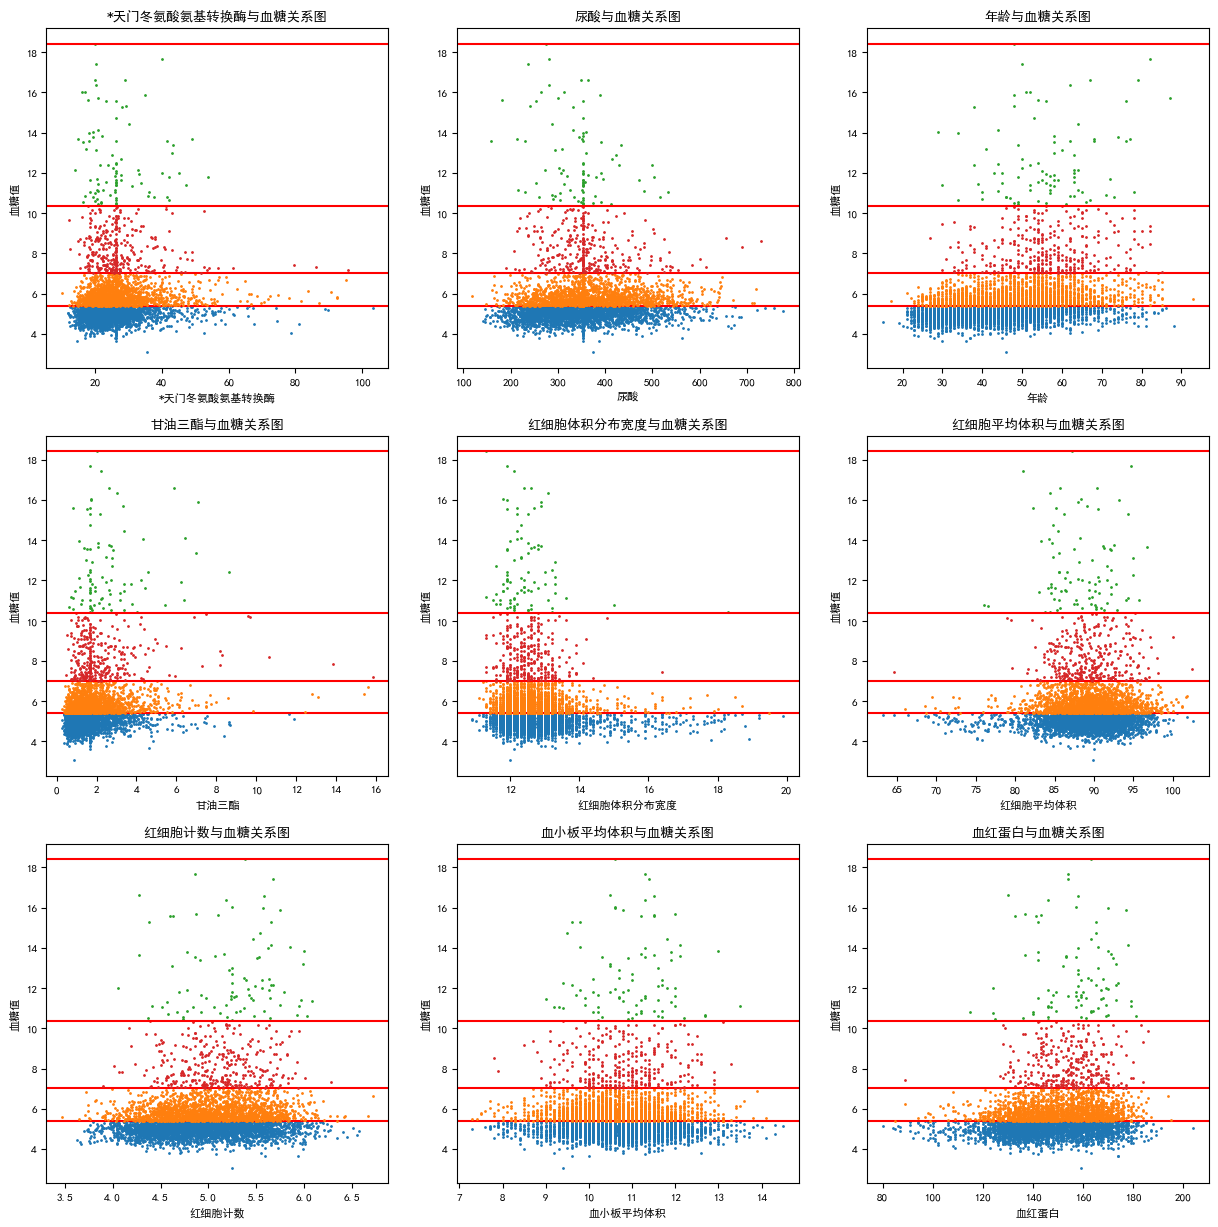

In [11]:
import pylab as plt
md = KMeans(n_clusters=4, n_init='auto').fit(X)
data['血糖分类'] = md.labels_
plt.figure(figsize=(15, 15))
k = 1
plt.rc('font', family = 'SimHei', size = 8)
plt.rc('axes', unicode_minus = False)
for j in data.columns[[0, 1, 2, 4, 5, 6, 7, 8, 9]]:
    plt.subplot(3, 3, k)
    plt.title(f'{j}与血糖关系图')
    for i in range(4):
        plt.plot(data[md.labels_ == i][j], data[md.labels_ == i]['血糖'], 'o', markersize = 1)
        plt.axhline(data[md.labels_ == i]['血糖'].max(), c = 'r')
    plt.ylabel('血糖值')
    plt.xlabel(j)
    k += 1
plt.savefig('糖尿病.png', dpi = 500)